# Resultados

En el presente documento se van a mostrar los resultados obtenidos por el agente construído con las descripciones definitivas de las herramientas.

##### Imports.

In [3]:
# https://huggingface.co/docs/transformers/main/installation#installation
# Transformers is tested on Python 3.6+, PyTorch 1.1.0+, TensorFlow 2.0+, and Flax. 
from	huggingface_hub				import	login				\
									,		InferenceClient
from	transformers				import	CodeAgent			\
									,		HfEngine			\
									,		ToolCollection

import	os
import	test_batch					as	tb


path		= os.getcwd()
os.chdir( os.path.dirname( os.getcwd() ) )
import	AnomalyTools
os.chdir( path )

##### Generación del Agente.

In [4]:
tool_box	= AnomalyTools.toolbox()
final_agent	= CodeAgent( tools = tool_box , add_base_tools = False )

##### Listas de prompts.

Se generan en varias listas diferenciadas para poder realizar las ejecuciones por separado y evitar el límite de información mostrada.

In [3]:
prompt_list		= 	\
	{	'1'		:	"Given the raw WADI dataset, analyse it for anomalies."
	,	'2'		:	"Given the raw WADI dataset, analyse it for anomalies. Use the default parameters and paths."
	,	'3'		:	"Given the raw WADI dataset, analyse it for anomalies using the default parameters and paths."
	,	'4'		:	"Given the raw WADI dataset, use the default parameters and paths to analyse it for anomalies."
	,	'5'		:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', analyse it for anomalies."
	,	'6'		:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', analyse it for anomalies. Use the default parameters and paths."
	,	'7'		:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', analyse it for anomalies using the default parameters and paths."
	,	'8'		:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', use the default parameters and paths to analyse it for anomalies."
	,	'9'		:	"Preprocess and analyse por anomalies the WADI dataset using the default parameters and paths."
	,	'10'	:	"Preprocess and analyse por anomalies the WADI dataset soterd in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' using the default parameters and paths."
	,	'11'	:	"Using the default parameters, analyse for anomalies the raw WADI dataset."
	,	'12'	:	"Using the default parameters, analyse for anomalies the WADI dataset. It is raw data, so it will need to be prerpocessed."
	,	'13'	:	"Preprocess the raw WADI dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and then analyse the result for anomalies."
	,	'14'	:	"Preprocess the raw WADI dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'."
	,	'15'	:	"Analise for anomalies the preprocessed WADI dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2'."
	,	'16'	:	"Analise for anomalies the WADI dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', but first, preprocess it."
	}

In [5]:
prompt_list_2	= 	\
	{	'17'	:	"Given the raw WADI dataset, analyse it for anomalies on test mode."
	,	'18'	:	"Given the raw WADI dataset, analyse it for anomalies ans test the results. Use the default parameters and paths."
	,	'19'	:	"Given the raw WADI dataset, analyse it for anomalies and test the results using the default parameters and paths."
	,	'20'	:	"Given the raw WADI dataset, use the default parameters and paths to analyse it for anomalies and test the results."
	,	'21'	:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', analyse it for anomalies on test mode."
	,	'22'	:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', analyse it for anomalies and test the results. Use the default parameters and paths."
	,	'23'	:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', analyse it for anomalies on test mode using the default parameters and paths."
	,	'24'	:	"Given the raw WADI dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas', use the default parameters and paths to analyse it for anomalies and test the results."
	,	'25'	:	"Preprocess and analyse por anomalies the WADI dataset on test mode  using the default parameters and paths."
	,	'26'	:	"Preprocess and analyse por anomalies the WADI dataset soterd in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' for testing using the default parameters and paths."
	,	'27'	:	"Using the default parameters for testing, analyse for anomalies the raw WADI dataset."
	,	'28'	:	"Using the default parameters, analyse for anomalies the WADI dataset on test mode. It is raw data, so it will need to be prerpocessed."
	,	'29'	:	"Preprocess the raw WADI dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' on test mode, save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and then analyse the result for anomalies."
	,	'30'	:	"Preprocess the raw WADI dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' for testing."
	,	'31'	:	"Analise for anomalies the preprocessed WADI dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and test the results."
	,	'32'	:	"Analise for anomalies the WADI dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas' and test results, but first, preprocess it."
	}

In [3]:
prompt_list_3	= 	\
	{	'33'	:	"Given the raw SWaT dataset, analyse it for anomalies."
	,	'34'	:	"Given the raw SWaT dataset, analyse it for anomalies. Use the default parameters and paths."
	,	'35'	:	"Given the raw SWaT dataset, analyse it for anomalies using the default parameters and paths."
	,	'36'	:	"Given the raw SWaT dataset, use the default parameters and paths to analyse it for anomalies."
	,	'37'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies."
	,	'38'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies. Use the default parameters and paths."
	,	'39'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies using the default parameters and paths."
	,	'40'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', use the default parameters and paths to analyse it for anomalies."
	,	'41'	:	"Preprocess and analyse por anomalies the SWaT dataset using the default parameters and paths."
	,	'42'	:	"Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' using the default parameters and paths."
	,	'43'	:	"Using the default parameters, analyse for anomalies the raw SWaT dataset."
	,	'44'	:	"Using the default parameters, analyse for anomalies the SWaT dataset. It is raw data, so it will need to be prerpocessed."
	,	'45'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and then analyse the result for anomalies."
	,	'46'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'."
	,	'47'	:	"Analise for anomalies the preprocessed SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'."
	,	'48'	:	"Analise for anomalies the SWaT dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', but first, preprocess it."
	}

In [4]:
prompt_list_4	= 	\
	{	'49'	:	"Given the raw SWaT dataset, analyse it for anomalies on test mode."
	,	'50'	:	"Given the raw SWaT dataset, analyse it for anomalies ans test the results. Use the default parameters and paths."
	,	'51'	:	"Given the raw SWaT dataset, analyse it for anomalies and test the results using the default parameters and paths."
	,	'52'	:	"Given the raw SWaT dataset, use the default parameters and paths to analyse it for anomalies and test the results."
	,	'53'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies on test mode."
	,	'54'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies and test the results. Use the default parameters and paths."
	,	'55'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies on test mode using the default parameters and paths."
	,	'56'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', use the default parameters and paths to analyse it for anomalies and test the results."
	,	'57'	:	"Preprocess and analyse por anomalies the SWaT dataset on test mode  using the default parameters and paths."
	,	'58'	:	"Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' for testing using the default parameters and paths."
	,	'59'	:	"Using the default parameters for testing, analyse for anomalies the raw SWaT dataset."
	,	'60'	:	"Using the default parameters, analyse for anomalies the SWaT dataset on test mode. It is raw data, so it will need to be prerpocessed."
	,	'61'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' on test mode, save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and then analyse the result for anomalies."
	,	'62'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' for testing."
	,	'63'	:	"Analise for anomalies the preprocessed SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' and test the results."
	,	'64'	:	"Analise for anomalies the SWaT dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' and test results, but first, preprocess it."
	}

In [3]:
prompt_list_5	= 	\
	{	'65'	:	"Given the raw SWaT dataset, analyse it for anomalies. Do it on test mode both for preprocessing and analysis."
	,	'66'	:	"Given the raw SWaT dataset, analyse it for anomalies ans test the results. Use the default parameters and paths on both preprocessing and analysis."
	,	'67'	:	"Given the raw SWaT dataset, analyse it for anomalies and test the results using the default parameters and paths for both preprocessing and analysis."
	,	'68'	:	"Given the raw SWaT dataset, use the default parameters and paths to analyse it for anomalies and test the results."
	,	'69'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies. Use test mode both for preprocessing and analysis."
	,	'70'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies and test the results. Use the default parameters and paths both for preprocessing and analysis."
	,	'71'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies, using test mode and the default parameters and paths both for preprocessing and analysis."
	,	'72'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', use the default parameters and paths, both for preprocessing and analysis, to analyse it for anomalies and test the results."
	,	'73'	:	"Preprocess and analyse por anomalies the SWaT dataset on test mode using the default parameters and paths both for preprocessing and analysis."
	,	'74'	:	"Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' for testing using the default parameters and paths on both preprocessing and analysis."
	,	'75'	:	"Using the default parameters for testing on both preprocessing and analysis, analyse for anomalies the raw SWaT dataset."
	,	'76'	:	"Using the default parameters, analyse for anomalies the SWaT dataset on test mode. It is raw data, so it will need to be prerpocessed, which whould need the same mode as the analysis."
	,	'77'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' on test mode, save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and then analyse the result for anomalies, also on test mode."
	,	'78'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' for testing."
	,	'79'	:	"Analise for anomalies the preprocessed SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' and test the results."
	,	'80'	:	"Analise for anomalies the SWaT dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' and test results, but first, preprocess it on test mode."
	}

In [5]:
prompt_list_6	= 	\
	{	'81'	:	"Given the raw SWaT dataset, analyse it for anomalies. Do it on test mode both for preprocessing and analysis. Use 'None' for all other parameters."
	,	'82'	:	"Given the raw SWaT dataset, analyse it for anomalies ans test the results. Use 'None' for all other parameters."
	,	'83'	:	"Given the raw SWaT dataset, analyse it for anomalies and test the results. Use 'None' for all other parameters on both preprocessing and analysis."
	,	'84'	:	"Given the raw SWaT dataset, analyse it for anomalies and test the results. Use 'None' for all other parameters."
	,	'85'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies. Use test mode both for preprocessing and analysis."
	,	'86'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies and test the results.  Use 'None' for all other parameters on both preprocessing and analysis."
	,	'87'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies, using test mode on both for preprocessing and analysis. Use 'None' for all other parameters."
	,	'88'	:	"Given the raw SWaT dataset in the route 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', analyse it for anomalies and test the results. Use 'None' for all other parameters on both preprocessing and analysis."
	,	'89'	:	"Preprocess and analyse por anomalies the SWaT dataset on test mode both for preprocessing and analysis. Use 'None' for all other parameters."
	,	'90'	:	"Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' for testing on both preprocessing and analysis. Use 'None' for all other parameters."
	,	'91'	:	"Using 'None' for all other parameters, and testing mode on both preprocessing and analysis, analyse for anomalies the raw SWaT dataset."
	,	'92'	:	"Using 'None' for all other parameters, analyse for anomalies the SWaT dataset on test mode. It is raw data, so it will need to be prerpocessed, which whould need the same mode as the analysis."
	,	'93'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' on test mode, save it in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2' and then analyse the result for anomalies, also on test mode. Use 'None' for all other parameters."
	,	'94'	:	"Preprocess the raw SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' for testing. Use 'None' for all other parameters."
	,	'95'	:	"Analise for anomalies the preprocessed SWaT dataset in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' and test the results. Use 'None' for all other parameters."
	,	'96'	:	"Analise for anomalies the SWaT dataset stored in 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT' and test results, but first, preprocess it on test mode. Use 'None' for all other parameters."
	}

##### Ejecuciones.

'RESULTS FOR  Final Agent:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 1:'

======== New task ========
Given the raw WADI dataset, analyse it for anomalies.
==== Agent is executing the code below:
import os
import json

raw_dataset_folder = '/raw/wadi/dataset'  # replace with your raw dataset folder path
preprocessed_dataset_folder = '/preprocessed/wadi/dataset'  # replace with your preprocessed dataset folder path

AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=raw_dataset_folder, output_dir=preprocessed_dataset_folder)

AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: You tried to execute the following code:
import os
import json

raw_dataset_folder = '/raw/wadi/dataset'  # replace with your raw dataset folder path
preprocessed_dataset_folder = '/preprocessed/wadi/dataset'  # replace with your preprocessed dataset folder path

AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=raw_dataset_folder, output_dir=preprocessed_dataset_folder)

AnomalyBERT_Analyzer(d

"Error in execution: You tried to execute the following code:\nimport os\nimport json\n\nraw_dataset_folder = '/raw/wadi/dataset'  # replace with your raw dataset folder path\npreprocessed_dataset_folder = '/preprocessed/wadi/dataset'  # replace with your preprocessed dataset folder path\n\nAnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=raw_dataset_folder, output_dir=preprocessed_dataset_folder)\n\nAnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_dataset_folder)\nYou got these outputs:\n\nEvaluation stopped at line '<_ast.Import object at 0x0000026033A25820>' because of the following error:\nImport of os is not allowed.. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 2:'

======== New task ========
Given the raw WADI dataset, analyse it for anomalies. Use the default parameters and paths.
==== Agent is executing the code below:
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='raw_data', dataset_mode='exploitation')
print(f"Preprocessed dataset path: {preprocessed_dataset_path}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_dataset_path)
print(f"Anomaly scores path: {anomaly_scores_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\py

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 3:'

======== New task ========
Given the raw WADI dataset, analyse it for anomalies using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = "WADI"
dataset_mode = "exploitation"
preprocessed_dataset_folder = r"D:\path\to\preprocessed\data"

AnomalyBERT_Data_Preprocessing(dataset_type, input_dir=r"D:\path\to\raw\data", output_dir=r"D:\path\to\preprocessed\data")
files_with_anomaly_scores = AnomalyBERT_Analyzer(dataset_type, dataset_mode=dataset_mode, preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores have been stored in {files_with_anomaly_scores}.")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'D:\\path\\to\\preprocessed\\data'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, stat

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'D:\\\\path\\\\to\\\\preprocessed\\\\data'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 4:'

======== New task ========
Given the raw WADI dataset, use the default parameters and paths to analyse it for anomalies.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type="WADI", input_dir="path_to_raw_data")
print(f"Preprocessed dataset folder: {preprocessed_dataset_folder}")
dataset_mode = "exploitation"
anomaly_result_path = AnomalyBERT_Analyzer(preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly result paths: {anomaly_result_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\age

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 5:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', analyse it for anomalies.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
preprocessed_dataset_folder, _ = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
print(f"The preprocessed data is stored in {preprocessed_dataset_folder}.")
AnomalyBERT_Analyzer(dataset_type, preprocessed=preprocessed_dataset_folder)
====
Error in execution: __call__() got an unexpected keyword argument 'preprocessed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py"

"Error in execution: __call__() got an unexpected keyword argument 'preprocessed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 6:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', analyse it for anomalies. Use the default parameters and paths.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\')
print(f"The preprocessed data is stored in {preprocessed_data_path}.")
AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data_path)
====


Anomaly BERT model for WADI loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=976, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

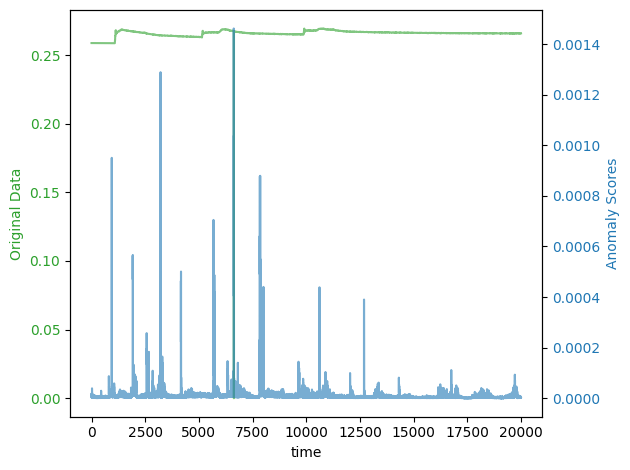

'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 7:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', analyse it for anomalies using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
preprocessed_dataset_folder = 'preprocessed_wadi_data'
dataset_mode = 'exploitation'

AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=input_dir, output_dir=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====


'preprocessed_wadi_data'

'----------------------------------------------------------------------------------------------------'

'Test prompt 8:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', use the default parameters and paths to analyse it for anomalies.
==== Agent is executing the code below:
raw_data_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=raw_data_dir)
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data_path)
print(f"Anomaly scores stored at: {anomaly_scores_path}")
====


5056 windows are computed.
10048 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

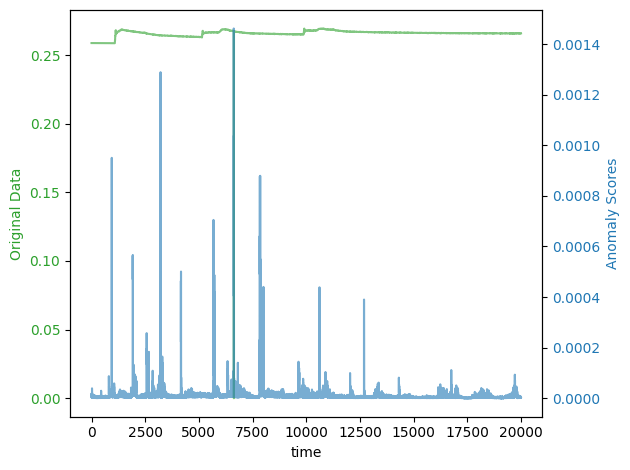

'Anomaly scores stored at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 9:'

======== New task ========
Preprocess and analyse por anomalies the WADI dataset using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=r"raw_data", output_dir=r"preprocessed_data", json_dir=r"json_files", date_label=None, dataset_mode='exploitation')
anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
Error in execution: [Errno 2] No such file or directory: 'raw_data\\WADI/WADI.A2_19 Nov 2019/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformer

"Error in execution: [Errno 2] No such file or directory: 'raw_data\\\\WADI/WADI.A2_19 Nov 2019/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 10:'

======== New task ========
Preprocess and analyse por anomalies the WADI dataset soterd in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' using the default parameters and paths.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas')
print(f"Preprocessed data is stored in {preprocessed_data_path}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data_path)
print(f"Anomaly scores are stored in {anomaly_scores_path}")
====


5056 windows are computed.
10048 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

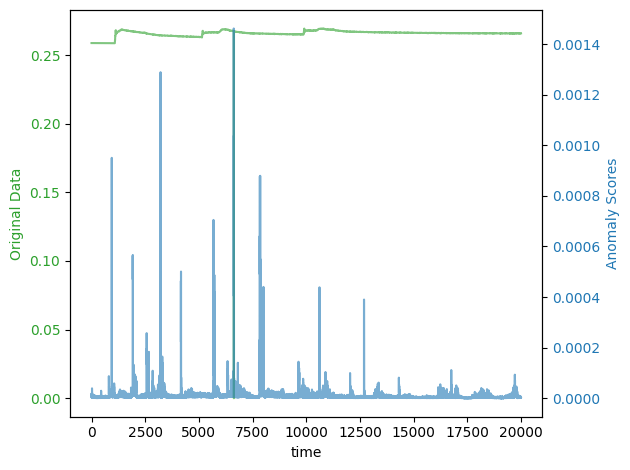

'Anomaly scores are stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 11:'

======== New task ========
Using the default parameters, analyse for anomalies the raw WADI dataset.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:/path/to/WADI/raw/data/' # replace with the actual path
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir)
print(f"The preprocessed dataset is stored in {preprocessed_dataset_folder}.")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/path/to/WADI/raw/data/processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(no

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/path/to/WADI/raw/data/processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 12:'

======== New task ========
Using the default parameters, analyse for anomalies the WADI dataset. It is raw data, so it will need to be prerpocessed.
==== Agent is executing the code below:
wadi_dataset_path = 'path_to_wadi_raw_data'
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=wadi_dataset_path)
print(f"Preprocessed data at: {preprocessed_dataset_path}")
anomaly_scores_path = AnomalyBERT_Analyzer(preprocessed_dataset_path)
print(f"Anomaly scores stored at: {anomaly_scores_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_wadi_raw_data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transf

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_wadi_raw_data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 13:'

======== New task ========
Preprocess the raw WADI dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and then analyse the result for anomalies.
==== Agent is executing the code below:
raw_data_folder = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_folder = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset_type = 'WADI'
date_label = None
dataset_mode = 'exploitation'

preprocessed_data_folder = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=raw_data_folder)
print(f"Preprocessed data stored in: {preprocessed_data_folder}")

anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_data_folder, dataset_mode=dataset_mode)
print(f"Anomaly scores stored in: {anomaly_scores_folder}")
====


5056 windows are computed.
10048 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

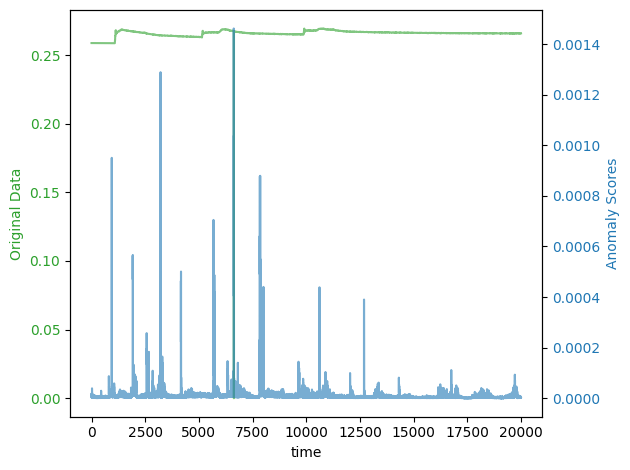

'Anomaly scores stored in: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 14:'

======== New task ========
Preprocess the raw WADI dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Preprocessed'
date_label = '25'
dataset_mode = 'exploitation'

preprocessed_data_folder = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir, output_dir=output_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.25/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  Fil

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.25/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 15:'

======== New task ========
Analise for anomalies the preprocessed WADI dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'.
==== Agent is executing the code below:
dataset_type = "WADI"
preprocessed_dataset_folder = "C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2"
dataset_mode = "exploitation"

AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=preprocessed_dataset_folder)
anomaly_folder = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2\\WADI/WADI.A2_19 Nov 2019/WADI_attackdataLABLE.csv'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas2\\\\WADI/WADI.A2_19 Nov 2019/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 16:'

======== New task ========
Analise for anomalies the WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', but first, preprocess it.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'
preprocessed_dataset_folder = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Preprocessed'
dataset_mode = 'exploitation'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder, dataset_mode=dataset_mode)
anomaly_files = AnomalyBERT_Analyzer('WADI', preprocessed_dataset_folder)
print('Anomaly files have been stored in:', anomaly_files)
====


5056 windows are computed.
10048 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Preprocessed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

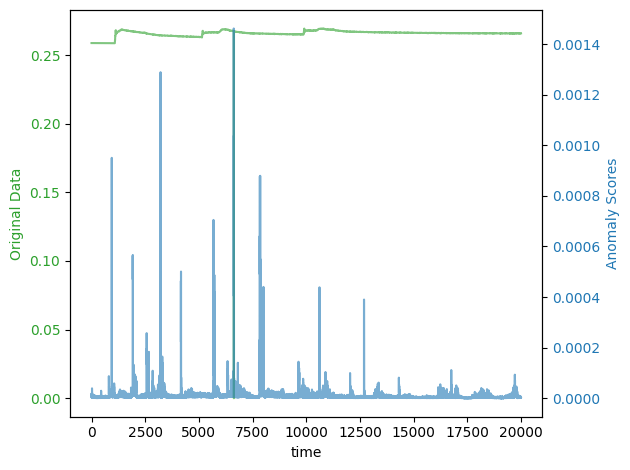

'Anomaly files have been stored in: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Preprocessed\\WADI_test_results.npy'

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [4]:
tb.prompt_tests( { "Final Agent" : final_agent } , "" , prompt_list )

'RESULTS FOR  Final Agent:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 17:'

======== New task ========
Given the raw WADI dataset, analyse it for anomalies on test mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'path_to_raw_WADI_dataset'
preprocessed_dataset_folder = r'path_to_directory_for_preprocessed_data'

AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder, dataset_mode='test')

anomaly_scores_files = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode='test')
print(f"Anomaly scores have been stored in the following files: {anomaly_scores_files}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_WADI_dataset\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_WADI_dataset\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 18:'

======== New task ========
Given the raw WADI dataset, analyse it for anomalies ans test the results. Use the default parameters and paths.
==== Agent is executing the code below:
AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data)
====
Error in execution: You tried to execute the following code:
AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data)
You got these outputs:

Evaluation stopped at line '<_ast.Expr object at 0x0000026028B93E80>' because of the following error:
The variable `preprocessed_data` is not defined.. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 401, in evaluate

"Error in execution: You tried to execute the following code:\nAnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data)\nYou got these outputs:\n\nEvaluation stopped at line '<_ast.Expr object at 0x0000026028B93E80>' because of the following error:\nThe variable `preprocessed_data` is not defined.. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 19:'

======== New task ========
Given the raw WADI dataset, analyse it for anomalies and test the results using the default parameters and paths.
==== Agent is executing the code below:
input_dir = "raw_wadi_dataset"
output_dir = "preprocessed_wadi_dataset"
dataset_mode = 'exploitation'
dataset_type = 'WADI'
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir, output_dir=output_dir, dataset_mode=dataset_mode)
print(f"Preprocessed data stored at {preprocessed_data}")
anomalyanalysis_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, dataset_mode=dataset_mode)
print(f"Anomaly analysis results stored at {anomalyanalysis_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_wadi_dataset\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.py

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_wadi_dataset\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 20:'

======== New task ========
Given the raw WADI dataset, use the default parameters and paths to analyse it for anomalies and test the results.
==== Agent is executing the code below:
AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='path_to_raw_dataset')
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing()
AnomalyBERT_Analyzer(preprocessed_dataset_path, dataset_type='WADI')
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_dataset\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\U

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_dataset\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 21:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', analyse it for anomalies on test mode.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyDetection\WADI'
dis = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
preprocessed_data_loc = dis
print(f"The preprocessed data has been stored in: {preprocessed_data_loc}.")
dataset_mode = 'test'
anomaly_result = AnomalyBERT_Analyzer(preprocessed_data_loc, dataset_type, dataset_mode=dataset_mode)
print(f"The result of the anomaly detection is: {anomaly_result}.")
====
Error in execution: [Errno 22] Invalid argument: 'logs/best_checkpoints/C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed_parameters.pt'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy

"Error in execution: [Errno 22] Invalid argument: 'logs/best_checkpoints/C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\processed_parameters.pt'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 22:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', analyse it for anomalies and test the results. Use the default parameters and paths.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
processed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\')
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=processed_dataset_folder)
print(f"The anomaly scores are stored at {anomaly_scores_path}.")
```<end_code>

In this code, we first preprocess the WADI dataset using the 'AnomalyBERT_Data_Preprocessing' tool, then we analyze the dataset for anomalies using the 'AnomalyBERT_Anal

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \nprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type=\'WADI\', input_dir=\'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\\')\nanomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=\'WADI\', preprocessed_dataset_folder=processed_dataset_folder)\nprint(f"The anomaly scores are stored at {anomaly_scores_path}.")\n```<end_code>\n\nIn this code, we first preprocess the WADI dataset using the \'AnomalyBERT_Data_Preprocessing\' tool, then we analyze the dataset for anomalies using the \'AnomalyBERT_Analyzer\' tool. The output of the analysis is the path of the files where the anomaly scores are stored.. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 23:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', analyse it for anomalies on test mode using the default parameters and paths.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
dataset_type = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
output_dir = AnomalyBERT_Data_Preprocessing()
AnomalyBERT_Analyzer(dataset_type, output_dir, dataset_mode='test')
```<end_code>

I will use the AnomalyBERT_Data_Preprocessing tool to preprocess the raw WADI dataset, and then the AnomalyBERT_Analyzer tool to analyze it for anomalies on test mode using the default parameters and paths.. Be sure to provide correct code
Traceback (mos

"Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \ndataset_type = 'WADI'\ninput_dir = r'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas'\nAnomalyBERT_Data_Preprocessing(dataset_type, input_dir)\noutput_dir = AnomalyBERT_Data_Preprocessing()\nAnomalyBERT_Analyzer(dataset_type, output_dir, dataset_mode='test')\n```<end_code>\n\nI will use the AnomalyBERT_Data_Preprocessing tool to preprocess the raw WADI dataset, and then the AnomalyBERT_Analyzer tool to analyze it for anomalies on test mode using the default parameters and paths.. Be sure to provide correct code"

'----------------------------------------------------------------------------------------------------'

'Test prompt 24:'

======== New task ========
Given the raw WADI dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas', use the default parameters and paths to analyse it for anomalies and test the results.
==== Agent is executing the code below:
wadi_dataset_type = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
preprocessed_dataset_folder = ''
dataset_mode = 'exploitation'

preprocessed_dataset_files = AnomalyBERT_Data_Preprocessing(dataset_type=wadi_dataset_type, input_dir=input_dir)
print(f"Preprocessed dataset files: {preprocessed_dataset_files}")

anomaly_scores_saved_files_path = AnomalyBERT_Analyzer(preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_type=wadi_dataset_type, dataset_mode=dataset_mode)
print(f"Anomaly scores saved files path: {anomaly_scores_saved_files_path}")
====
Error in execution: [Errno 2] No such file or directory: 'WADI_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C

"Error in execution: [Errno 2] No such file or directory: 'WADI_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 25:'

======== New task ========
Preprocess and analyse por anomalies the WADI dataset on test mode  using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:\path\to\input\directory'
dataset_mode = 'test'
preprocessed_dataset_folder, _ = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir)
AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\path\\to\\input\\directory\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\py

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\input\\\\directory\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 26:'

======== New task ========
Preprocess and analyse por anomalies the WADI dataset soterd in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' for testing using the default parameters and paths.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas')
print(f"Preprocessed dataset folder: {preprocessed_dataset_folder}")
anomaly_scores_directory = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode='test')
print(f"Anomaly scores directory: {anomaly_scores_directory}")
====


5056 windows are computed.
10048 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas\processed\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

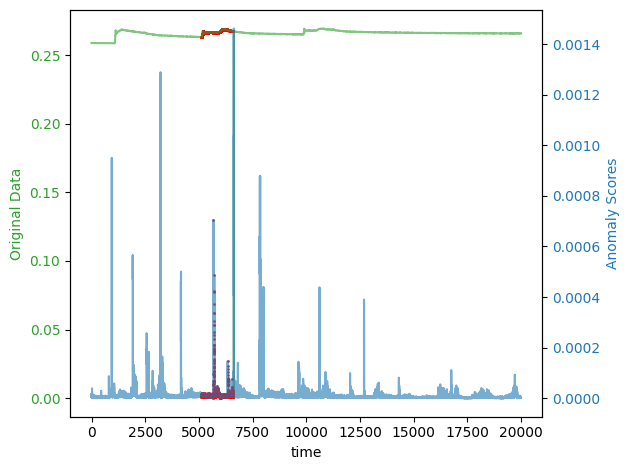

'Anomaly scores directory: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 27:'

======== New task ========
Using the default parameters for testing, analyse for anomalies the raw WADI dataset.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:\\path\\to\\raw\\WADI\\dataset'
preprocessed_dataset_folder = 'preprocessed_WADI_dataset'
dataset_mode = 'exploitation'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder, dataset_mode=dataset_mode)
AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\raw\\\\WADI\\\\dataset\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\py

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\\\\\path\\\\\\\\to\\\\\\\\raw\\\\\\\\WADI\\\\\\\\dataset\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 28:'

======== New task ========
Using the default parameters, analyse for anomalies the WADI dataset on test mode. It is raw data, so it will need to be prerpocessed.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='input_dir', dataset_mode='test')
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=preprocessed_data_path, dataset_mode='test')
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'input_dir\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_r

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'input_dir\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 29:'

======== New task ========
Preprocess the raw WADI dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' on test mode, save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and then analyse the result for anomalies.
==== Agent is executing the code below:
path_to_raw_data = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\'
path_to_output_data = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2\\'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir=path_to_raw_data, output_dir=path_to_output_data, dataset_mode='test')
print(f"Preprocessed data stored in {preprocessed_data_path}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='WADI', preprocessed_dataset_folder=path_to_output_data)
print(f"Anomaly scores stored in {anomaly_scores_path}")
====


5056 windows are computed.
10048 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2\WADI_test_results.npy


<Figure size 1600x400 with 0 Axes>

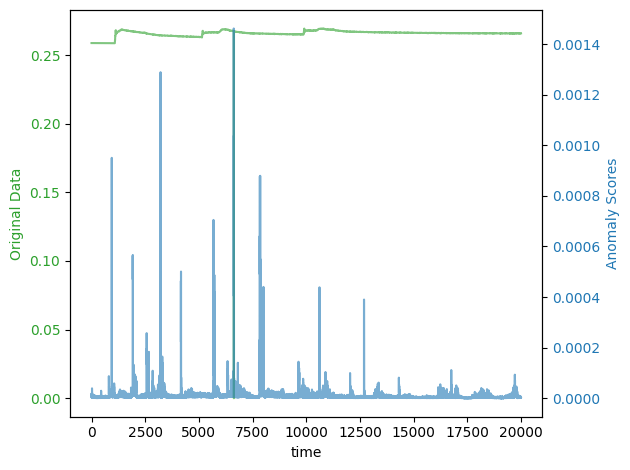

'Anomaly scores stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2\\WADI_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 30:'

======== New task ========
Preprocess the raw WADI dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' for testing.
==== Agent is executing the code below:
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type='WADI', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas')
print(f"The preprocessed data is stored in {preprocessed_data}")
====


'The preprocessed data is stored in C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 31:'

======== New task ========
Analise for anomalies the preprocessed WADI dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and test the results.
==== Agent is executing the code below:
dataset_type = 'WADI'
preprocessed_dataset_folder = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset_mode = 'exploitation'
files_path = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode)
print(f"Files path where the anomaly scores have been stored: {files_path}")
====


5056 windows are computed.
10048 windows are computed.
exploitation


<Figure size 1600x400 with 0 Axes>

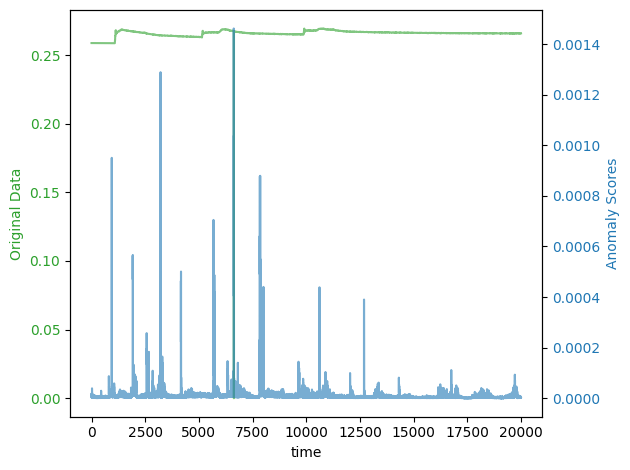

'Files path where the anomaly scores have been stored: exploitation'

'----------------------------------------------------------------------------------------------------'

'Test prompt 32:'

======== New task ========
Analise for anomalies the WADI dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas' and test results, but first, preprocess it.
==== Agent is executing the code below:
dataset_type = 'WADI'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas'
preprocessed_dataset_folder = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Preprocessed'
output_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Preprocessed'
json_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Preprocessed\\json'
date_label = 'date_label'
dataset_mode = 'exploitation'

AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir, output_dir=output_dir, json_dir=json_dir, date_label=date_label, dataset_mode=dataset_mode)
====
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas\\WADI/WADI.date_label/WADI_attackdataLABLE.csv'. Be sure to provide cor

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\Pruebas\\\\WADI/WADI.date_label/WADI_attackdataLABLE.csv'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [7]:
tb.prompt_tests( { "Final Agent" : final_agent } , "" , prompt_list_2 )

'RESULTS FOR  Final Agent:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 33:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='raw_SWaT_dataset')
print(f"Preprocessed dataset saved at {preprocessed_dataset_folder}")
anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores saved at {anomaly_scores_folder}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_SWaT_dataset\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in 

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_SWaT_dataset\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 34:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies. Use the default parameters and paths.
==== Agent is executing the code below:
dataset_type = 'SWaT'
output = AnomalyBERT_Analyzer(dataset_type=dataset_type)
print(f"The path of the files where the anomaly scores have been stored is {output}.")
====


Anomaly BERT model for SWaT loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=700, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

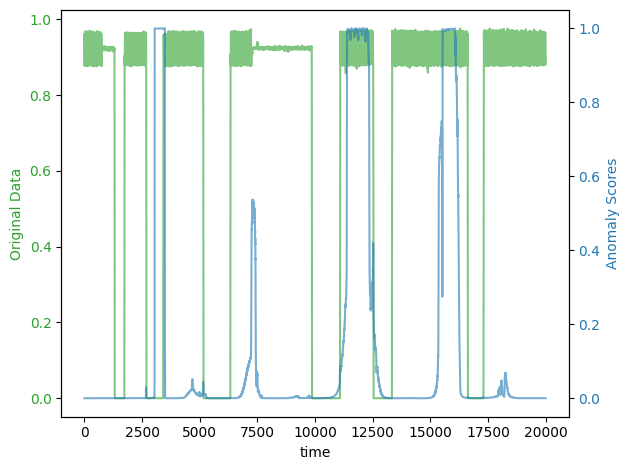

'The path of the files where the anomaly scores have been stored is \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 35:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies using the default parameters and paths.
==== Agent is executing the code below:
preprocessed_dataset = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='path_to_SWaT_dataset')
print(f"Preprocessed dataset saved at {preprocessed_dataset}")
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset)
print(f"Anomaly scores stored at {anomaly_scores}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_SWaT_dataset\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", 

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_SWaT_dataset\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 36:'

======== New task ========
Given the raw SWaT dataset, use the default parameters and paths to analyse it for anomalies.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\path\to\raw\SWaT\data\t'  # replace with actual path
processed_dataset = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir)
print(f"Preprocessed dataset at {processed_dataset}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=processed_dataset)
print(f"Anomaly scores saved at {anomaly_scores_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\path\\to\\raw\\SWaT\\data\\t\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiy

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\raw\\\\SWaT\\\\data\\\\t\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 37:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies.
==== Agent is executing the code below:
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\')
print(f"Preprocessed dataset path: {preprocessed_dataset_path}")
AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_path)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

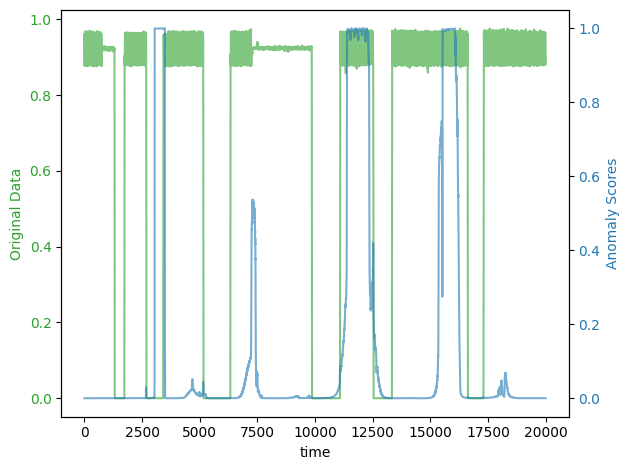

'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 38:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies. Use the default parameters and paths.
==== Agent is executing the code below:
from cat_fetcher import cat_fetcher

# Preprocess the data
processed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT')

# Analyze the data for anomalies
anomaly_scores_stored_location = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=processed_dataset_path)

# Print the result
print(f"The path of the files where the anomaly scores have been stored is {anomaly_scores_stored_location}.")
====
Error in execution: You tried to execute the following code:
from cat_fetcher import cat_fetcher

# Preprocess the data
processed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataS

'Error in execution: You tried to execute the following code:\nfrom cat_fetcher import cat_fetcher\n\n# Preprocess the data\nprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type=\'SWaT\', input_dir=\'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\AnomalyBERT\')\n\n# Analyze the data for anomalies\nanomaly_scores_stored_location = AnomalyBERT_Analyzer(dataset_type=\'SWaT\', preprocessed_dataset_folder=processed_dataset_path)\n\n# Print the result\nprint(f"The path of the files where the anomaly scores have been stored is {anomaly_scores_stored_location}.")\nYou got these outputs:\n\nEvaluation stopped at line \'<_ast.ImportFrom object at 0x0000019C163B6C10>\' because of the following error:\nImport from cat_fetcher is not allowed.. Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 39:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies using the default parameters and paths.
==== Agent is executing the code below:
AnomalyBERT_Analyzer(dataset_type='SWaT')
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

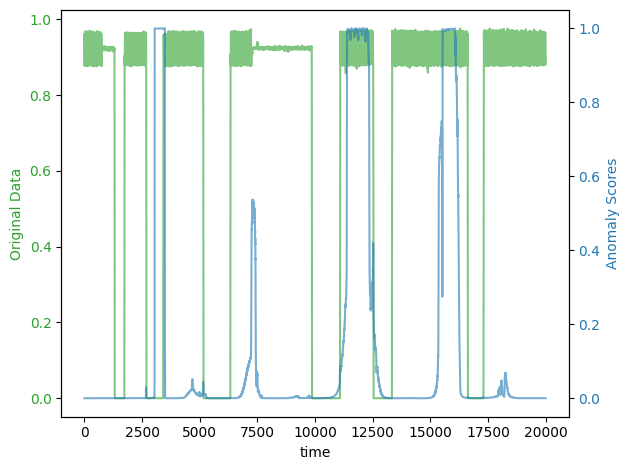

'\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 40:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', use the default parameters and paths to analyse it for anomalies.
==== Agent is executing the code below:
raw_dataset_folder = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'
dataset_type = 'SWaT'
preprocessed_dataset_folder, _ = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=raw_dataset_folder)
_, plots_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Error in execution: [Errno 2] No such file or directory: 'C\\SWaT_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\ag

"Error in execution: [Errno 2] No such file or directory: 'C\\\\SWaT_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 41:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = "SWaT"
input_dir = r"path/to/input/directory"
preprocessed_dataset_folder = r"path/to/preprocessed/directory"
dataset_mode = "exploitation"

AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder, dataset_mode=dataset_mode)
AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path/to/preprocessed/directory'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpr

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path/to/preprocessed/directory'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 42:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
file_path_preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
print(f"Preprocessed data stored in {file_path_preprocessed_data}.")
result = AnomalyBERT_Analyzer('SWaT')
print(f"Anomaly scores stored in {result}.")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

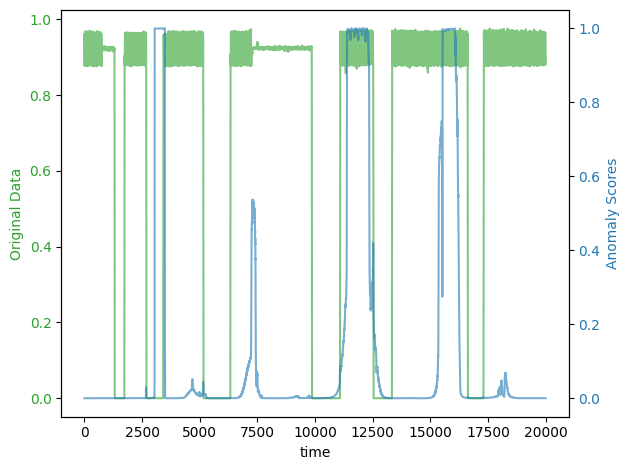

'Anomaly scores stored in \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 43:'

======== New task ========
Using the default parameters, analyse for anomalies the raw SWaT dataset.
==== Agent is executing the code below:
swat_dataset = 'SWaT'
input_dir = r'C:\path\to\SWaT\raw\data'  # replace with actual path
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type=swat_dataset, input_dir=input_dir)
print(f'Preprocessed dataset path: {preprocessed_dataset_path}')
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=swat_dataset, preprocessed_dataset_folder=preprocessed_dataset_path)
print(f'Anomaly scores path: {anomaly_scores_path}')
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\path\\to\\SWaT\\raw\\data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\SWaT\\\\raw\\\\data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 44:'

======== New task ========
Using the default parameters, analyse for anomalies the SWaT dataset. It is raw data, so it will need to be prerpocessed.
==== Agent is executing the code below:
preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='./raw_SWaT_data')
print(f"Preprocessed dataset path: {preprocessed_dataset_path}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_path['path'])
print(f"Anomaly scores path: {anomaly_scores_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: './raw_SWaT_data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: './raw_SWaT_data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 45:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and then analyse the result for anomalies.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'

AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir, output_dir=output_dir)

preprocessed_data_folder = AnomalyBERT_Data_Preprocessing(preprocessed_data_folder=output_dir, dataset_mode='exploitation')

anomaly_scores_path, _ = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_data_folder)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Error in execut

"Error in execution: __call__() got an unexpected keyword argument 'preprocessed_data_folder'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 46:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
dataset_mode = 'exploitation'  # You can choose any of the other options if needed
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT_Preprocessed'
preprocessed_directory_path = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir)
print(f"Preprocessed data stored in: {preprocessed_directory_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'Preprocessed data stored in: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT_Preprocessed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 47:'

======== New task ========
Analise for anomalies the preprocessed SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'.
==== Agent is executing the code below:
preprocessed_dataset_folder = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
dataset_type = 'SWaT'
input_dir = preprocessed_dataset_folder
output_dir = preprocessed_dataset_folder
dataset_mode = 'exploitation'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=output_dir, dataset_mode=dataset_mode)
anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode='exploitation')
print(f"The path of the files where the anomaly scores have been stored is {anomaly_scores_folder}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

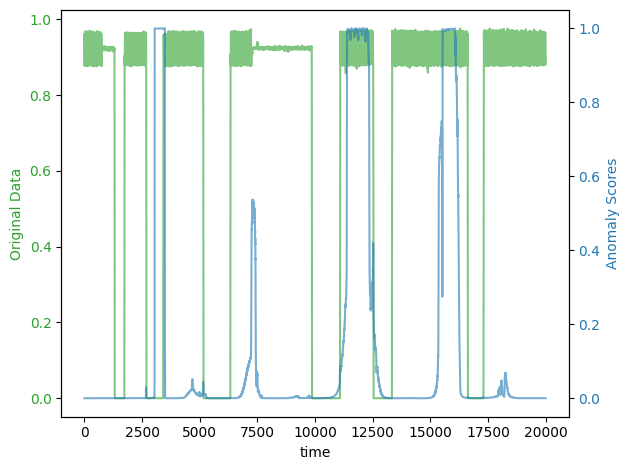

'The path of the files where the anomaly scores have been stored is C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 48:'

======== New task ========
Analise for anomalies the SWaT dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', but first, preprocess it.
list index out of range
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 423, in extract_action
    split[-2],
IndexError: list index out of range


'ERROR: the agent raised a catastrophic error while trying to generate the code to run.'

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [5]:
tb.prompt_tests( { "Final Agent" : final_agent } , "" , prompt_list_3 )

'RESULTS FOR  Final Agent:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 49:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies on test mode.
==== Agent is executing the code below:
raw_dataset_type = 'SWaT'
input_dir = r'C:\path\to\raw\SWaT\dataset'
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type=raw_dataset_type, input_dir=input_dir)
print(f"Preprocessed data: {preprocessed_data}")

dataset_mode = 'test'
analysis_result = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_data, dataset_mode=dataset_mode)
print(f"Analysis result: {analysis_result}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\path\\to\\raw\\SWaT\\dataset\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roamin

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\raw\\\\SWaT\\\\dataset\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 50:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies ans test the results. Use the default parameters and paths.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\path\to\SWaT\raw\data'
output_dir = r'C:\path\to\SWaT\preprocessed\data'

preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir)

dataset_mode = 'test'
anomaly_scores_folder = AnomalyBERT_Analyzer(preprocessed_dataset_folder, dataset_type, dataset_mode)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\path\\to\\SWaT\\preprocessed\\data'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\a

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\SWaT\\\\preprocessed\\\\data'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 51:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies and test the results using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = "SWaT"
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir=r'C:\Raw SWaT Dataset', output_dir=r'C:\Preprocessed SWaT Dataset')
anomalies_result_path = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\Raw SWaT Dataset\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = ev

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\Raw SWaT Dataset\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 52:'

======== New task ========
Given the raw SWaT dataset, use the default parameters and paths to analyse it for anomalies and test the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'/path/to/input/directory'  # Replace with your directory path
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)

dataset_mode = 'test'
preprocessed_dataset_folder = r'/path/to/output/directory'  # Replace with your directory path
anomaly_results = AnomalyBERT_Analyzer(dataset_type, dataset_mode, preprocessed_data, preprocessed_dataset_folder)
print(f"Anomaly results: {anomaly_results}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: '/path/to/input/directory\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, ava

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: '/path/to/input/directory\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 53:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies on test mode.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
preprocessed_dataset_folder, = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
anomaly_scores_path, = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode='test')
print(f"The path of the files where the anomaly scores have been stored is: {anomaly_scores_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Error in execution: [Errno 2] No such file or directory: 'C\\SWaT_test.npy'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\tran

"Error in execution: [Errno 2] No such file or directory: 'C\\\\SWaT_test.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 54:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies and test the results. Use the default parameters and paths.
==== Agent is executing the code below:
anomalies_path = AnomalyBERT_Analyzer(dataset_type="SWaT")
print(f"The path where the anomaly scores have been stored is: {anomalies_path}")
====


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

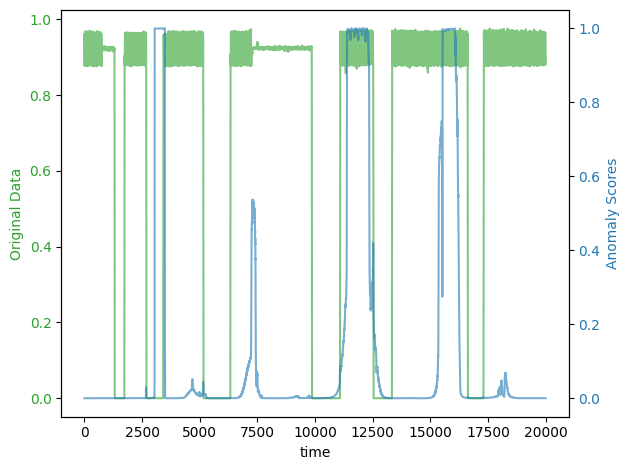

'The path where the anomaly scores have been stored is: \\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 55:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies on test mode using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = "SWaT"
input_dir = r"C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT"
preprocessed_dataset_folder = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\preprocessed_data'
dataset_mode = "test"

AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder)

AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Error in execution: [Errno 2] No such file or directory: 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT

"Error in execution: [Errno 2] No such file or directory: 'C:\\\\Users\\\\zoiyy\\\\OneDrive\\\\Documentos\\\\DataSets\\\\TFM\\\\AnomalyBERT\\\\preprocessed_data\\\\SWaT_test_label.npy'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 56:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', use the default parameters and paths to analyse it for anomalies and test the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'
preprocessed_dataset_folder = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\preprocessed_data'
output = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder)
print(f"Preprocessed dataset saved at {output}")
AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder)
print("Anomaly scores analysis done")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\preprocessed_data\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

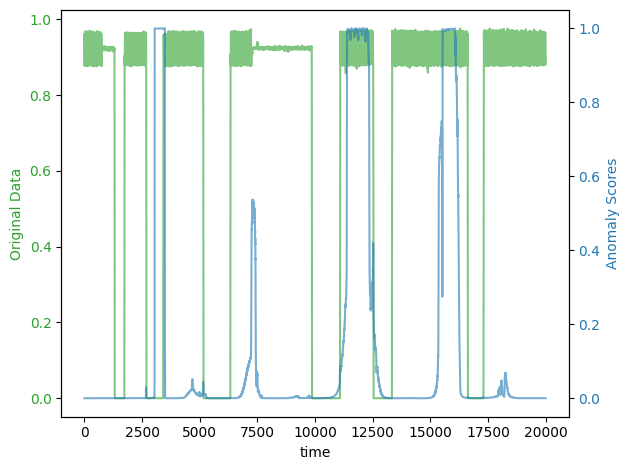

'Anomaly scores analysis done'

'----------------------------------------------------------------------------------------------------'

'Test prompt 57:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset on test mode  using the default parameters and paths.
==== Agent is executing the code below:
processed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir=r'', dataset_mode='test')
print(f"Processed data path: {processed_data_path}")
AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=processed_data_path, dataset_mode='test')
====
Error in execution: [Errno 2] No such file or directory: 'SWaT/Physical\\SWaT_Dataset_Attack_v0.xlsx'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate

"Error in execution: [Errno 2] No such file or directory: 'SWaT/Physical\\\\SWaT_Dataset_Attack_v0.xlsx'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 58:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' for testing using the default parameters and paths.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
preprocessed_dataset_folder, _ = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 59:'

======== New task ========
Using the default parameters for testing, analyse for anomalies the raw SWaT dataset.
==== Agent is executing the code below:
dataset_type = 'SWaT'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir='path_to_raw_swat_data', output_dir='path_to_preprocessed_data')
AnomalyBERT_Analyzer(dataset_type)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_swat_data\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_swat_data\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 60:'

======== New task ========
Using the default parameters, analyse for anomalies the SWaT dataset on test mode. It is raw data, so it will need to be prerpocessed.
==== Agent is executing the code below:
preprocessed_data_folder = AnomalyBERT_Data_Preprocessing('SWaT', input_dir=r'raw_data_path', dataset_mode='test')
print(f"Preprocessed data stored in {preprocessed_data_folder}")
anomaly_plot_path = AnomalyBERT_Analyzer('SWaT', preprocessed_dataset_folder=preprocessed_data_folder)
print(f"Anomaly scores stored in {anomaly_plot_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_data_path\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\tran

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_data_path\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 61:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' on test mode, save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and then analyse the result for anomalies.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2'
dataset_mode = 'test'

preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir, dataset_mode='test')
print(f"Preprocessed dataset saved at: {preprocessed_dataset_path}")

anomaly_scores = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_path)
print(f"Anomaly scores generated: {anomaly_scores}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

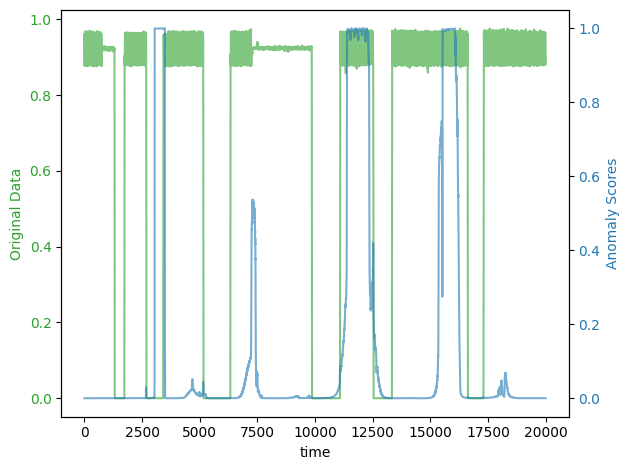

'Anomaly scores generated: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\Pruebas2\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 62:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' for testing.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'

'----------------------------------------------------------------------------------------------------'

'Test prompt 63:'

======== New task ========
Analise for anomalies the preprocessed SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' and test the results.
==== Agent is executing the code below:
path_to_dataset = "C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\"
dataset_type = 'SWaT'
preprocessed_dataset_folder = path_to_dataset
dataset_mode = 'exploitation'

AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=preprocessed_dataset_folder)

anomaly_results_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomaly results stored at: {anomaly_results_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

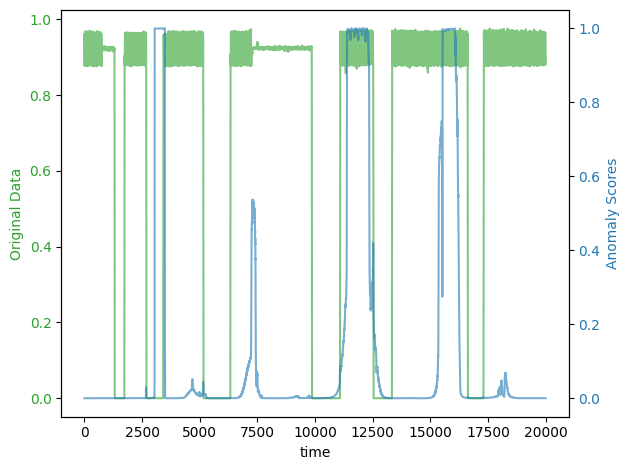

'Anomaly results stored at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 64:'

======== New task ========
Analise for anomalies the SWaT dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' and test results, but first, preprocess it.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT_preprocessed'
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir)
print(f"Preprocessed data stored in {preprocessed_data}.")
anomaly_results = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=output_dir)
print(f"Anomaly results: {anomaly_results}.")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT_preprocessed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

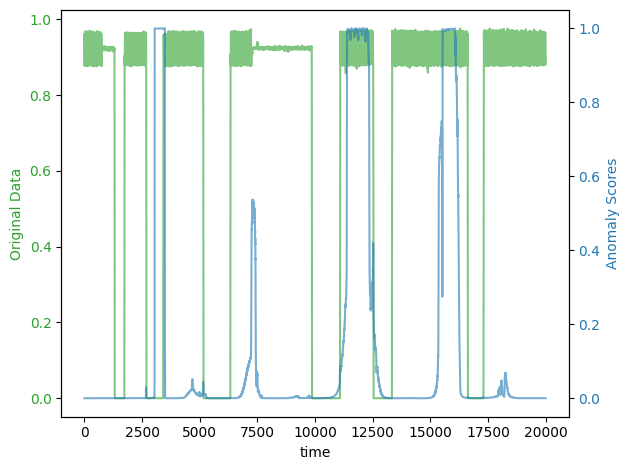

'Anomaly results: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT_preprocessed\\SWaT_test_results.npy.'

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [6]:
tb.prompt_tests( { "Final Agent" : final_agent } , "" , prompt_list_4 )

'RESULTS FOR  Final Agent:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 65:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies. Do it on test mode both for preprocessing and analysis.
==== Agent is executing the code below:
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='SWaT_raw_data', dataset_mode='test')
print(f"Preprocessed data path is {preprocessed_data}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='preprocessed_data', dataset_mode='test')
print(f"Anomaly scores path is {anomaly_scores_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'SWaT_raw_data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\tr

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'SWaT_raw_data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 66:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies ans test the results. Use the default parameters and paths on both preprocessing and analysis.
==== Agent is executing the code below:
preprocessed_dataset = AnomalyBERT_Data_Preprocessing(dataset_type="SWaT", input_dir="")
anomaly_results = AnomalyBERT_Analyzer(dataset_type="SWaT", preprocessed_dataset_folder="")
====
Error in execution: [Errno 2] No such file or directory: 'SWaT/Physical\\SWaT_Dataset_Attack_v0.xlsx'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 511, in evaluate_python_code
    line_result = evaluate_ast(node, state, tools)
  File "C:\Users\zoiyy\AppDat

"Error in execution: [Errno 2] No such file or directory: 'SWaT/Physical\\\\SWaT_Dataset_Attack_v0.xlsx'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 67:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies and test the results using the default parameters and paths for both preprocessing and analysis.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = r'C:\path\to\preprocessed\dataset'
dataset_mode = 'exploitation'

AnomalyBERT_Data_Preprocessing(dataset_type, input_dir=r'C:\path\to\raw\dataset', output_dir=preprocessed_dataset_folder)
anomaly_results = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"The path of the files where the anomaly scores have been stored is {anomaly_results}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\path\\to\\preprocessed\\dataset'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in 

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\\\path\\\\to\\\\preprocessed\\\\dataset'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 68:'

======== New task ========
Given the raw SWaT dataset, use the default parameters and paths to analyse it for anomalies and test the results.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
```'`
dataset_type = 'SWaT'
preprocessed_dataset_folder = 'path_to_preprocessed_data_folder'  # raw string path
dataset_mode = 'exploitation'
raw_dataset_folder = 'path_to_raw_data_folder'  # raw string path

AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=raw_dataset_folder, output_dir=preprocessed_dataset_folder, dataset_mode=dataset_mode)

anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)
print(f"Anomalies analyzed and scores stored at {anomaly_scores_path}")
```

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \n```\'`\ndataset_type = \'SWaT\'\npreprocessed_dataset_folder = \'path_to_preprocessed_data_folder\'  # raw string path\ndataset_mode = \'exploitation\'\nraw_dataset_folder = \'path_to_raw_data_folder\'  # raw string path\n\nAnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=raw_dataset_folder, output_dir=preprocessed_dataset_folder, dataset_mode=dataset_mode)\n\nanomaly_scores_path = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode=dataset_mode)\nprint(f"Anomalies analyzed and scores stored at {anomaly_scores_path}")\n```<end_code>```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 69:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies. Use test mode both for preprocessing and analysis.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT_preprocessed'
json_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT_json'
dataset_mode = 'test'

preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=output_dir, json_dir=json_dir, dataset_mode=dataset_mode)
print(f"Preprocessed dataset folder: {preprocessed_dataset_folder}")

anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_folder, dataset_mode='test')
print(f"Anomaly scores folder: {anomaly_scores_folder}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl

Anomaly BERT model for SWaT loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=700, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

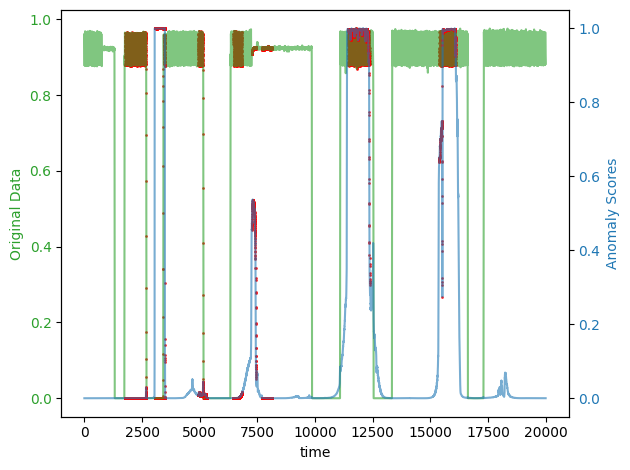

'Anomaly scores folder: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT_preprocessed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 70:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies and test the results. Use the default parameters and paths both for preprocessing and analysis.
==== Agent is executing the code below:
answer = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT')
print(f"Preprocessed dataset path: {answer}")

answer = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=answer)
print(f"Anomaly scores and plots saved at: {answer}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

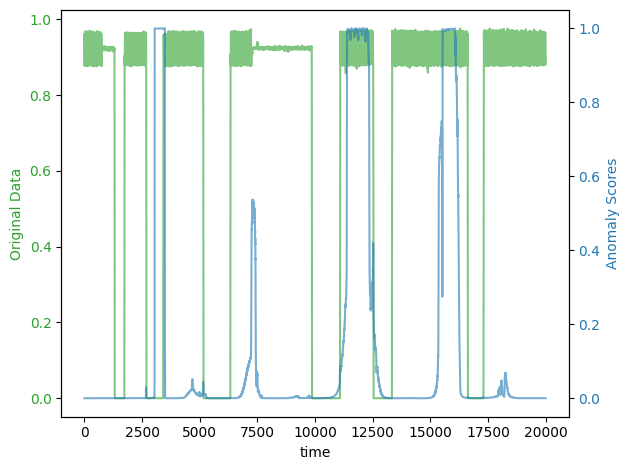

'Anomaly scores and plots saved at: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 71:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies, using test mode and the default parameters and paths both for preprocessing and analysis.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type="SWaT", input_dir=r"C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT")
print(f"Preprocessed dataset stored at {preprocessed_dataset_folder}")

result_folder = AnomalyBERT_Analyzer(dataset_type="SWaT", dataset_mode="test", preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomaly scores stored at {result_folder} and plotted")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

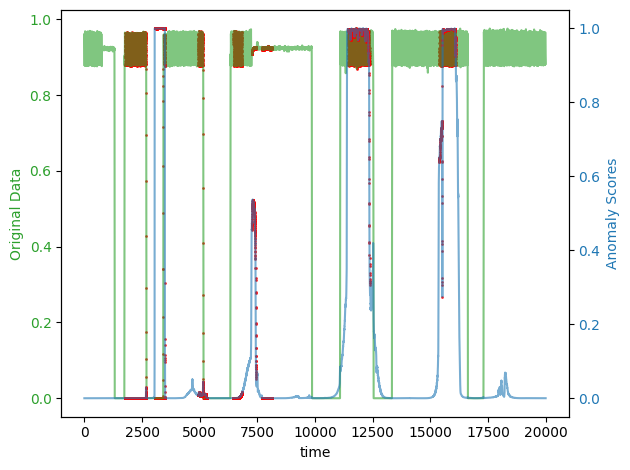

'Anomaly scores stored at C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy and plotted'

'----------------------------------------------------------------------------------------------------'

'Test prompt 72:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', use the default parameters and paths, both for preprocessing and analysis, to analyse it for anomalies and test the results.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type="SWaT", input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT')
print(f"Preprocessed data stored in: {preprocessed_data_path}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type="SWaT", preprocessed_dataset_folder=preprocessed_data_path, dataset_mode="exploitation")
print(f"Anomaly scores stored in: {anomaly_scores_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

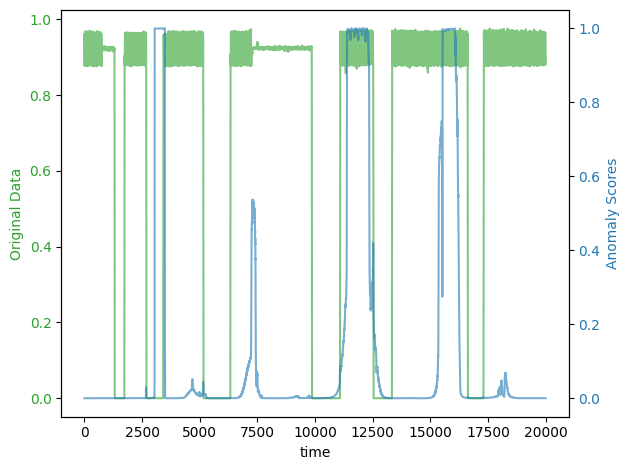

'Anomaly scores stored in: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 73:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset on test mode using the default parameters and paths both for preprocessing and analysis.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:/path/to/SWaT/raw/data'  # replace with the actual path
preprocessed_dataset_folder = 'preprocessed_data_folder'
dataset_mode = 'test'

preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=preprocessed_dataset_folder)

AnomalyBERT_Analyzer(dataset_type, preprocessed_data_folder)
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/path/to/SWaT/raw/data\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\P

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/path/to/SWaT/raw/data\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 74:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' for testing using the default parameters and paths on both preprocessing and analysis.
==== Agent is executing the code below:
processed_data_path = AnomalyBERT_Data_Preprocessing('SWaT', 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\')
print(f"Processed data path: {processed_data_path}")
anomaly_scores_path = AnomalyBERT_Analyzer('SWaT', preprocessed_dataset_folder=processed_data_path)
print(f"Anomaly scores path: {anomaly_scores_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

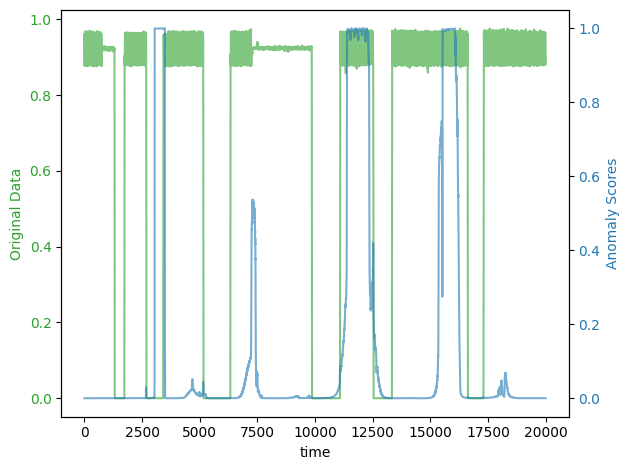

'Anomaly scores path: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 75:'

======== New task ========
Using the default parameters for testing on both preprocessing and analysis, analyse for anomalies the raw SWaT dataset.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='raw SWaT data', output_dir='preprocessed_data', dataset_mode='test')
print(f"The preprocessed dataset is stored in {preprocessed_dataset_folder}.")
anomaly_results = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_folder)
print(f"Anomalies results are stored in {anomaly_results}.")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw SWaT data\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw SWaT data\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 76:'

======== New task ========
Using the default parameters, analyse for anomalies the SWaT dataset on test mode. It is raw data, so it will need to be prerpocessed, which whould need the same mode as the analysis.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='path_to_raw_SWaT_data', dataset_mode='test')
print(f"Preprocessed dataset folder: {preprocessed_dataset_folder}")
anomalies_folder = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode='test')
print(f"Anomalies folder: {anomalies_folder}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_SWaT_data\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_acti

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'path_to_raw_SWaT_data\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 77:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' on test mode, save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and then analyse the result for anomalies, also on test mode.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
``` 
anomaly_results = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=path_to_output_data, dataset_mode='test')
print(f"The anomaly results are stored at {anomaly_results}")
```. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 98, in parse_code_blob
    return match.group(1).strip()
AttributeError: 'NoneType' object 

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \n``` \nanomaly_results = AnomalyBERT_Analyzer(dataset_type=\'SWaT\', preprocessed_dataset_folder=path_to_output_data, dataset_mode=\'test\')\nprint(f"The anomaly results are stored at {anomaly_results}")\n```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 78:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' for testing.
==== Agent is executing the code below:
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
dataset_type = 'SWaT'
output_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT_Preprocess'
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir=output_dir)
print(preprocessed_data_path)
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT_Preprocess'

'----------------------------------------------------------------------------------------------------'

'Test prompt 79:'

======== New task ========
Analise for anomalies the preprocessed SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' and test the results.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'

preprocessed_data_dir = AnomalyBERT_Data_Preprocessing(dataset_type=dataset_type, input_dir=input_dir)
print(f"Preprocessed data directory: {preprocessed_data_dir}")

anomaly_scores_dir = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_data_dir)
print(f"Anomaly scores directory: {anomaly_scores_dir}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

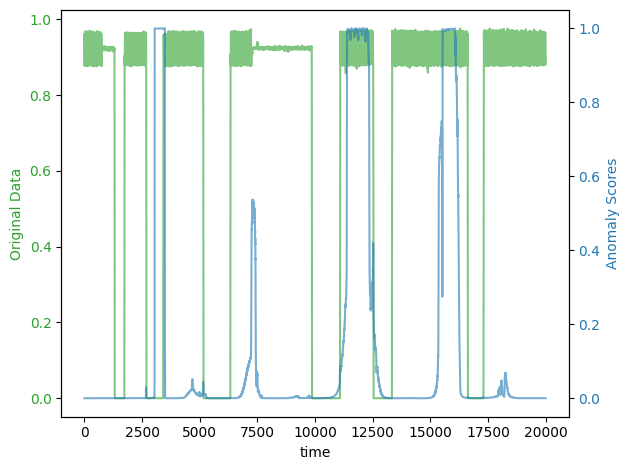

'Anomaly scores directory: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 80:'

======== New task ========
Analise for anomalies the SWaT dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' and test results, but first, preprocess it on test mode.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', 
                                                             input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', 
                                                             dataset_mode='test')
print(f"The preprocessed dataset folder is {preprocessed_dataset_folder}.")

anomaly_scores_folder = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocess_folder=preprocessed_dataset_folder)
print(f"The result folder with anomaly scores is {anomaly_scores_folder}.")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Error in ex

"Error in execution: __call__() got an unexpected keyword argument 'preprocess_folder'. Be sure to provide correct code."

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [4]:
tb.prompt_tests( { "Final Agent" : final_agent } , "" , prompt_list_5 )

'RESULTS FOR  Final Agent:'

'----------------------------------------------------------------------------------------------------'

'Test prompt 81:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies. Do it on test mode both for preprocessing and analysis. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='input_dir', dataset_mode='test', output_dir=None, json_dir=None, date_label=None)
print(f"Preprocessed data path: {preprocessed_data_path}")
anomaly_result_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_data_path, dataset_mode='test')
print(f"Anomaly result path: {anomaly_result_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'input_dir\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, st

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'input_dir\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 82:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies ans test the results. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='raw_data', output_dir='preprocessed_data')
print(f"Preprocessed data path is {preprocessed_data_path}")
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_data_path, dataset_mode='exploitation')
print(f"Anomaly scores path is {anomaly_scores}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_data\\json'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-pa

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: 'raw_data\\\\json'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 83:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies and test the results. Use 'None' for all other parameters on both preprocessing and analysis.
==== Agent is executing the code below:
raw_data_folder = r'/path/to/raw_data_folder'
preprocessed_data, _ = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir=raw_data_folder, output_dir=None, json_dir=None, date_label=None, dataset_mode=None)
print(f"Preprocessed data stored at {preprocessed_data}")
anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_data)
print(f"Anomaly scores stored at {anomaly_scores_path}")
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: '/path/to/raw_data_folder\\processed'. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_eval

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: '/path/to/raw_data_folder\\\\processed'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 84:'

======== New task ========
Given the raw SWaT dataset, analyse it for anomalies and test the results. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='raw_SWaT_dataset', None, None, None)
print(f"The preprocessed dataset is {preprocessed_data}.")
anomaly_scores = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_data, dataset_mode='exploitation', None)
print(f"The anomaly scores are {anomaly_scores}.")
====
Error in execution: The code generated by the agent is not valid.
positional argument follows keyword argument (<unknown>, line 1). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.py", line 502, in evaluate_python_code
    expression = ast.parse(code)
  File "c:\ProgramData\anaconda3\envs\AnomalyBERT_env2\lib\ast.py

'Error in execution: The code generated by the agent is not valid.\npositional argument follows keyword argument (<unknown>, line 1). Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 85:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies. Use test mode both for preprocessing and analysis.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir=r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', dataset_mode='test')
print(f"Preprocessed dataset folder: {preprocessed_dataset_folder}")

anomaly_scores_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode='test')
print(f"Anomaly scores path: {anomaly_scores_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Anomaly BERT model for SWaT loaded: 

AnomalyTransformer(
  (linear_embedding): Linear(in_features=700, out_features=512, bias=True)
  (transformer_encoder): TransformerEncoder(
    (encoder_layers): ModuleList(
      (0-5): 6 x EncoderLayer(
        (attention_layer): MultiHeadAttentionLayer(
          (word_fc_layers): ModuleList(
            (0-2): 3 x Linear(in_features=512, out_features=512, bias=True)
          )
          (output_fc_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (feed_forward_layer): PositionWiseFeedForwardLayer(
          (first_fc_layer): Linear(in_features=512, out_features=2048, bias=True)
          (second_fc_layer): Linear(in_features=2048, out_features=512, bias=True)
          (activation_layer): GELU()
          (dropout_layer): Dropout(p=0.1, inplace=False)
        )
        (norm_layers): ModuleList(
          (0-1): 2 x LayerNorm((512,), eps=1e-06, elementwise_affine=True)
        )
        (dropout_layer): Dropout(p=0

<Figure size 1600x400 with 0 Axes>

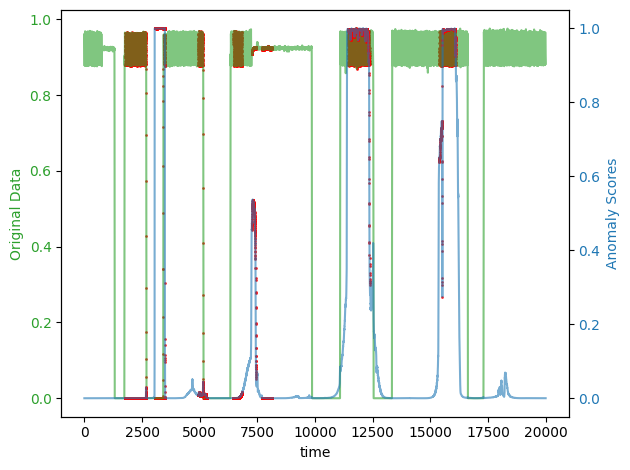

'Anomaly scores path: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 86:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies and test the results.  Use 'None' for all other parameters on both preprocessing and analysis.
Error in code parsing: The code blob you used is invalid: due to the following error: 'NoneType' object has no attribute 'group'. This means that the regex pattern ```(?:py|python)?\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: 
raw_data_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
dataset_type = 'SWaT'
output_dir = None
json_dir = None
date_label = None
dataset_mode = 'exploitation'

preprocessed_data_dir = AnomalyBERT_Data_Preprocessing(dataset_type, raw_data_dir)
print(f"Preprocessed data is stored in {preprocessed_data_dir}")

AnomalyBERT_Analyzer(dataset_type, preprocessed_data_dir)
```. Be sure to provide correct code
Traceback (most recent call last):
  File "C:\Users\zoiyy\A

'Error in code parsing: The code blob you used is invalid: due to the following error: \'NoneType\' object has no attribute \'group\'. This means that the regex pattern ```(?:py|python)?\\n(.*?)``` was not respected. Make sure to correct its formatting. Code blob was: \nraw_data_dir = r\'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\'\ndataset_type = \'SWaT\'\noutput_dir = None\njson_dir = None\ndate_label = None\ndataset_mode = \'exploitation\'\n\npreprocessed_data_dir = AnomalyBERT_Data_Preprocessing(dataset_type, raw_data_dir)\nprint(f"Preprocessed data is stored in {preprocessed_data_dir}")\n\nAnomalyBERT_Analyzer(dataset_type, preprocessed_data_dir)\n```. Be sure to provide correct code'

'----------------------------------------------------------------------------------------------------'

'Test prompt 87:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies, using test mode on both for preprocessing and analysis. Use 'None' for all other parameters.
==== Agent is executing the code below:
dataset_type = 'SWaT'
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', dataset_mode='test')
anomaly_scores = AnomalyBERT_Analyzer(dataset_type=dataset_type, preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode='test')
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

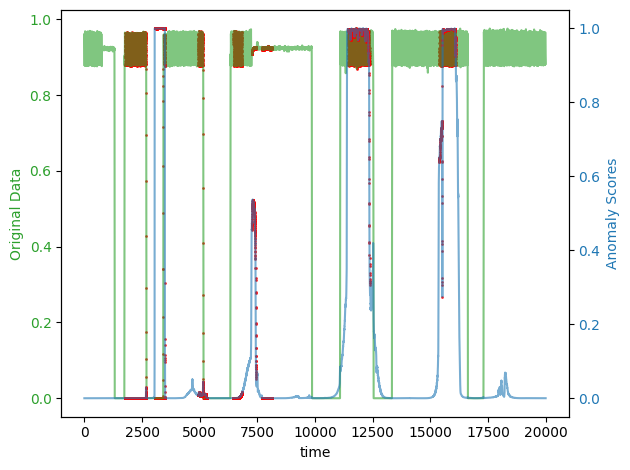

'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 88:'

======== New task ========
Given the raw SWaT dataset in the route 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT', analyse it for anomalies and test the results. Use 'None' for all other parameters on both preprocessing and analysis.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'
data_preprocessed = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir)
print(f"Preprocessed data stored at {data_preprocessed}")
anomaly_results = AnomalyBERT_Analyzer(data_preprocessed, dataset_type='train', preprocessed_dataset_folder='.', dataset_mode='exploitation')
print(f"Anomaly scores stored at {anomaly_results}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
Error in execution: __call__() got multiple values for argument 'dataset_type'. Be sure to provide

"Error in execution: __call__() got multiple values for argument 'dataset_type'. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 89:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset on test mode both for preprocessing and analysis. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_dataset_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir=None, dataset_mode='test', output_dir=None, json_dir=None, date_label=None)
print(f"Preprocessed data has been stored in {preprocessed_dataset_folder}.")
anomaly_score_files = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_dataset_folder, dataset_mode='test', output_dir=None)
print(f"Anomaly scores have been stored in {anomaly_score_files}.")
====
Error in execution: expected str, bytes or os.PathLike object, not NoneType. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, ava

'Error in execution: expected str, bytes or os.PathLike object, not NoneType. Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 90:'

======== New task ========
Preprocess and analyse por anomalies the SWaT dataset soterd in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' for testing on both preprocessing and analysis. Use 'None' for all other parameters.
==== Agent is executing the code below:
processed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT', output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\preprocessed', dataset_mode='test')
print(f"Preprocessed data stored at {processed_data_path}")

analyzed_anomalies_path = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\preprocessed')
print(f"Anomalies analyzed and stored at {analyzed_anomalies_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not sup

5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\preprocessed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

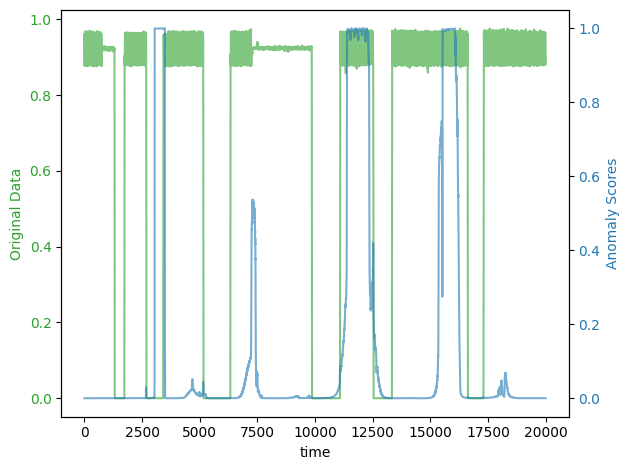

'Anomalies analyzed and stored at C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\preprocessed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 91:'

======== New task ========
Using 'None' for all other parameters, and testing mode on both preprocessing and analysis, analyse for anomalies the raw SWaT dataset.
==== Agent is executing the code below:
swat_dataset_type = 'SWaT'
swat_input_dir = r'C:/path/to/your/swat/dataset'  # replace with your directory path
preprocessed_files = AnomalyBERT_Data_Preprocessing(dataset_type=swat_dataset_type, input_dir=swat_input_dir, test_mode=True, None, None)  # test_mode=True for testing mode
print(f"Preprocessed files: {preprocessed_files}")

anomaly_scores_files = AnomalyBERT_Analyzer(preprocessed_files, test_mode=True, dataset_type=swat_dataset_type, preprocessed_dataset_folder=None)
print(f"Anomaly scores files: {anomaly_scores_files}")
====
Error in execution: The code generated by the agent is not valid.
positional argument follows keyword argument (<unknown>, line 3). Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38

'Error in execution: The code generated by the agent is not valid.\npositional argument follows keyword argument (<unknown>, line 3). Be sure to provide correct code.'

'----------------------------------------------------------------------------------------------------'

'Test prompt 92:'

======== New task ========
Using 'None' for all other parameters, analyse for anomalies the SWaT dataset on test mode. It is raw data, so it will need to be prerpocessed, which whould need the same mode as the analysis.
==== Agent is executing the code below:
preprocessed_data = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir='', output_dir='', json_dir='', date_label='', dataset_mode='test')
result = AnomalyBERT_Analyzer(dataset_type='SWaT', preprocessed_dataset_folder=preprocessed_data, dataset_mode='test')
====
Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code.
Traceback (most recent call last):
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\agents.py", line 566, in run
    output = self.python_evaluator(code_action, available_tools, state=self.state)
  File "C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\transformers\agents\python_interpreter.

"Error in execution: [WinError 3] El sistema no puede encontrar la ruta especificada: ''. Be sure to provide correct code."

'----------------------------------------------------------------------------------------------------'

'Test prompt 93:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' on test mode, save it in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\Pruebas2' and then analyse the result for anomalies, also on test mode. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_data_path = AnomalyBERT_Data_Preprocessing(dataset_type="SWaT", input_dir="C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT", dataset_mode="test")
print(f"Preprocessed data path: {preprocessed_data_path}")

anomaly_results = AnomalyBERT_Analyzer(dataset_type="SWaT", preprocessed_dataset_folder=preprocessed_data_path, dataset_mode="test")
print(f"Anomaly results path: {anomaly_results}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

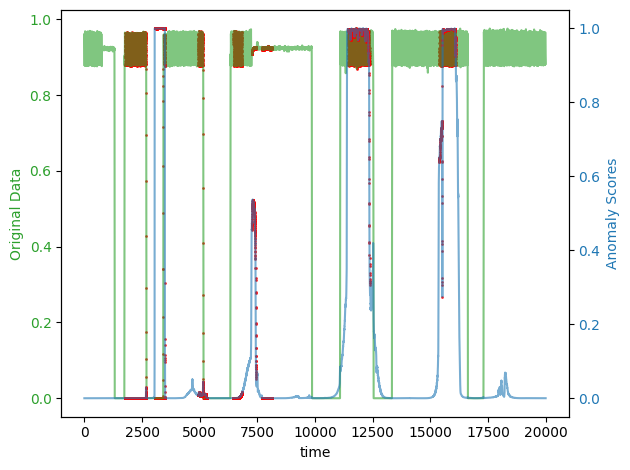

'Anomaly results path: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 94:'

======== New task ========
Preprocess the raw SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' for testing. Use 'None' for all other parameters.
==== Agent is executing the code below:
dataset_type = 'SWaT'
input_dir = r'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT'
AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\preprocessed', json_dir='C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\json_dir', date_label='None', dataset_mode='test')
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\preprocessed'

'----------------------------------------------------------------------------------------------------'

'Test prompt 95:'

======== New task ========
Analise for anomalies the preprocessed SWaT dataset in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' and test the results. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_dataset_folder = 'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT'
dataset_type = 'SWaT'
input_dir = preprocessed_dataset_folder
output_dir = None
json_dir = None
date_label = None
dataset_mode = 'exploitation'

preprocessed_dataset_path = AnomalyBERT_Data_Preprocessing(dataset_type, input_dir, output_dir, json_dir, date_label, dataset_mode)
print(f"Preprocessed dataset path: {preprocessed_dataset_path}")

anomaly_results_path = AnomalyBERT_Analyzer(dataset_type, preprocessed_dataset_path)
print(f"Anomaly results path: {anomaly_results_path}")
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn

5056 windows are computed.
10048 windows are computed.
15040 windows are computed.
20032 windows are computed.
25024 windows are computed.
C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT\processed\SWaT_test_results.npy


<Figure size 1600x400 with 0 Axes>

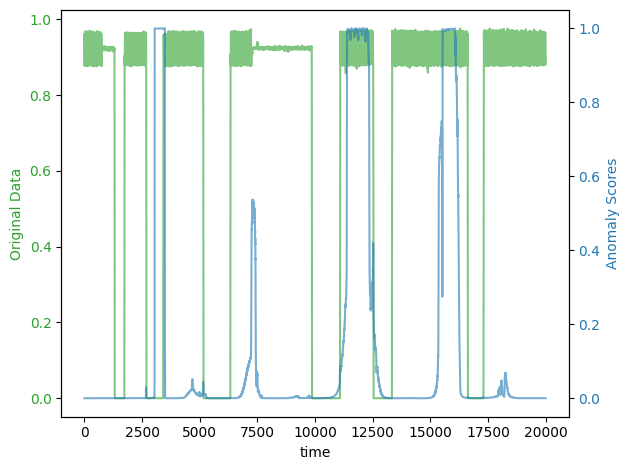

'Anomaly results path: C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed\\SWaT_test_results.npy'

'----------------------------------------------------------------------------------------------------'

'Test prompt 96:'

======== New task ========
Analise for anomalies the SWaT dataset stored in 'C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT' and test results, but first, preprocess it on test mode. Use 'None' for all other parameters.
==== Agent is executing the code below:
preprocessed_data_folder = AnomalyBERT_Data_Preprocessing(dataset_type='SWaT', input_dir=r"C:\Users\zoiyy\OneDrive\Documentos\DataSets\TFM\AnomalyBERT", dataset_mode='test')
====
C:\Users\zoiyy\AppData\Roaming\Python\Python38\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


'C:\\Users\\zoiyy\\OneDrive\\Documentos\\DataSets\\TFM\\AnomalyBERT\\processed'

'===================================================================================================='

'===================================================================================================='

'TEST END'

In [6]:
tb.prompt_tests( { "Final Agent" : final_agent } , "" , prompt_list_6 )